In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

from figure_formatting import figure_formatting as ff
ff.formatting['axes.linewidth'] = 0.5
ff.formatting['lines.linewidth'] = 1.0
ff.set_formatting()
ff.set_formatting()

In [2]:
colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51'}

In [3]:
columns = [ 'avg' ] + [ 'd_{}'.format(i) for i in range(1,41) ]
# Read energies of ga structures each generation, and rescale to energy per atom, relative to the DFT ground-state.
data = (pd.read_csv( '../Data/atat_ga2.out', delim_whitespace=True, names=columns) + (213.62335325*8))/256
data['0p'] = np.percentile( data.loc[:,'d_1':'d_40'], q=0, axis=1 )
data['25p'] = np.percentile( data.loc[:,'d_1':'d_40'], q=25, axis=1 )
data['50p'] = np.percentile( data.loc[:,'d_1':'d_40'], q=50, axis=1 )
data['75p'] = np.percentile( data.loc[:,'d_1':'d_40'], q=75, axis=1 )
data['100p'] = np.percentile( data.loc[:,'d_1':'d_40'], q=100, axis=1 )
data['std'] = np.std( data.loc[:,'d_1':'d_40'], axis=1 )

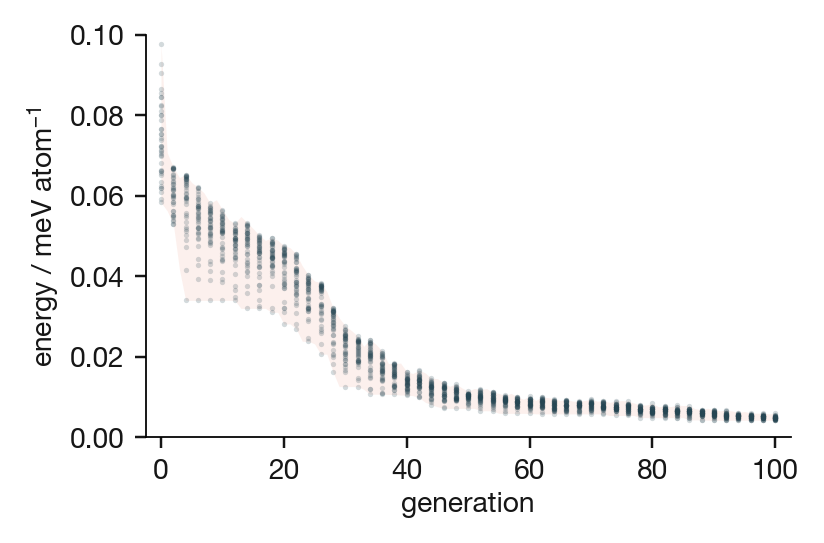

In [4]:
fig, ax = plt.subplots(figsize=(3.3,2.2))

# plt.fill_between( data.index, data['25p'], data['75p'], alpha=0.4, color='moccasin', linewidth=0  )
ax.fill_between( data.index, data['0p'], data['100p'], alpha=0.1, color=colors['dark orange'], linewidth=0 )
for i in range(1,41):
    ax.plot( data.index[::2], data['d_{}'.format(i)][::2], 'o', color=colors['blue'], alpha=0.2, ms=1.5, markeredgewidth=0.0, clip_on=False )
#     plt.plot( data.index[::5], data['d_{}'.format(i)][::5], 'o', color='grey', alpha=0.2, ms=3 )
# plt.plot( data.index, data['50p'], alpha=0.8 )
# plt.xticks( data.index )
ax.set_xlabel( 'generation' )
ax.set_ylabel( 'energy / meV atom$^{-1}$')
ax.ticklabel_format(style='plain')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim([-2.5,102.5])
ax.set_ylim([0.0, 0.1])
fig.tight_layout()
plt.savefig('../Figures/ga_minimisation.pdf')
plt.show()